In [1]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

In [2]:
from stockai import Stock

td = Stock('AMZN')
prices_list = td.get_historical_prices('2019-11-02', '2019-11-14')

df = pd.DataFrame.from_dict(prices_list)
df

,volume,close,low,open,high,date,adjclose
0,2790400,1791.439941,1785.209961,1788.010010,1797.449951,2019-11-01,1791.439941
1,2771900,1804.660034,1801.010010,1801.010010,1815.060059,2019-11-04,1804.660034
2,1885500,1801.709961,1794.000000,1809.160034,1810.250000,2019-11-05,1801.709961
3,2029800,1795.770020,1788.579956,1801.000000,1802.500000,2019-11-06,1795.770020
4,2651100,1788.199951,1783.479980,1803.760010,1805.900024,2019-11-07,1788.199951
5,2123300,1785.880005,1774.040039,1787.890015,1789.880005,2019-11-08,1785.880005
6,1946000,1771.650024,1767.130005,1778.000000,1780.000000,2019-11-11,1771.650024
7,2037600,1778.000000,1771.910034,1774.660034,1786.219971,2019-11-12,1778.000000
8,2989500,1753.109985,1747.319946,1773.390015,1775.000000,2019-11-13,1753.109985


In [3]:
# Get data function
def get_data(df):  
    data = df.copy()
    data['date'] = data['date'].str.split('-').str[2]
    data['date'] = pd.to_numeric(data['date'])
    return [ data['date'].tolist(), data['close'].tolist() ] # Convert Series to list
dates, prices = get_data(df)
dates

[1, 4, 5, 6, 7, 8, 11, 12, 13]

In [13]:
# predict and plot function
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


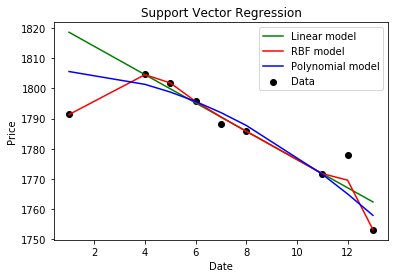

(1727.6094926117291, 1757.688591657622, 1750.267675787005)

In [18]:
predicted_price = predict_prices(dates, prices, [14])
predicted_price

In [19]:
price = td.get_historical_prices('2019-11-14', '2019-11-14')
print(price['close']) 

[1753.1099853515625, 1753.1099853515625]
